<a href="https://colab.research.google.com/github/askery/Ibm_openprize_2022_qtime/blob/main/trotter_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# install qiskit and dependencies
!pip install qiskit
!pip install pylatexenc

In [ ]:
# save from github in your PC and upload the file "troter_utils.py"
# get file @ https://github.com/askery/Ibm_openprize_2022_qtime
from google.colab import files
uploaded = files.upload()

Saving troter_utils.py to troter_utils (2).py


In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
from troter_utils import *

In [ ]:
import qiskit
import pandas as pd

### Quantum Devices


In [ ]:
# After you're logged into your new account visit: 
# https://quantumexperience.ng.bluemix.net/qx/account/advanced 
# --> where you'll need to generate an API Token
#
# THIS IS NOT BEST PRACTICE, BUT GET THINGS DONE FOR THE MOMENT - Replace my key with your key below
# 1- save your key in a file named "myibmkey.txt"
# 2- upload your key file
key = files.upload()

Saving myibmkey.txt to myibmkey (1).txt


In [ ]:
key = pd.read_csv('myibmkey.txt')
qiskit.IBMQ.save_account(str(key.values))

configrc.store_credentials:WARNING:2022-02-09 19:35:54,880: Credentials already present. Set overwrite=True to overwrite.


In [ ]:
# Show Quantum Device Overiew
#provider

In [ ]:
# load IBMQ Account data
provider = qiskit.IBMQ.load_account()

# Get backend for experiment
provider = qiskit.IBMQ.get_provider(hub='ibm-q-community', group='ibmquantumawards', project='open-science-22')
jakarta  = provider.get_backend('ibmq_jakarta')

# Simulated backend based on ibmq_jakarta's device noise profile
sim_noisy_jakarta = QasmSimulator.from_backend(provider.get_backend('ibmq_jakarta'))

# Noiseless simulated backend
sim_no_noise = QasmSimulator()

ibmqfactory.load_account:WARNING:2022-02-09 19:36:39,166: Credentials are already in use. The existing account in the session will be replaced.


____________

### First order, 4 steps, uniform time

Single trotterization step:


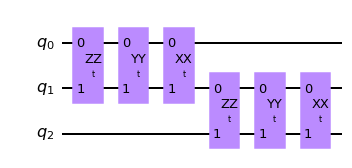

################################################################################

All steps + measurements of state tomography:


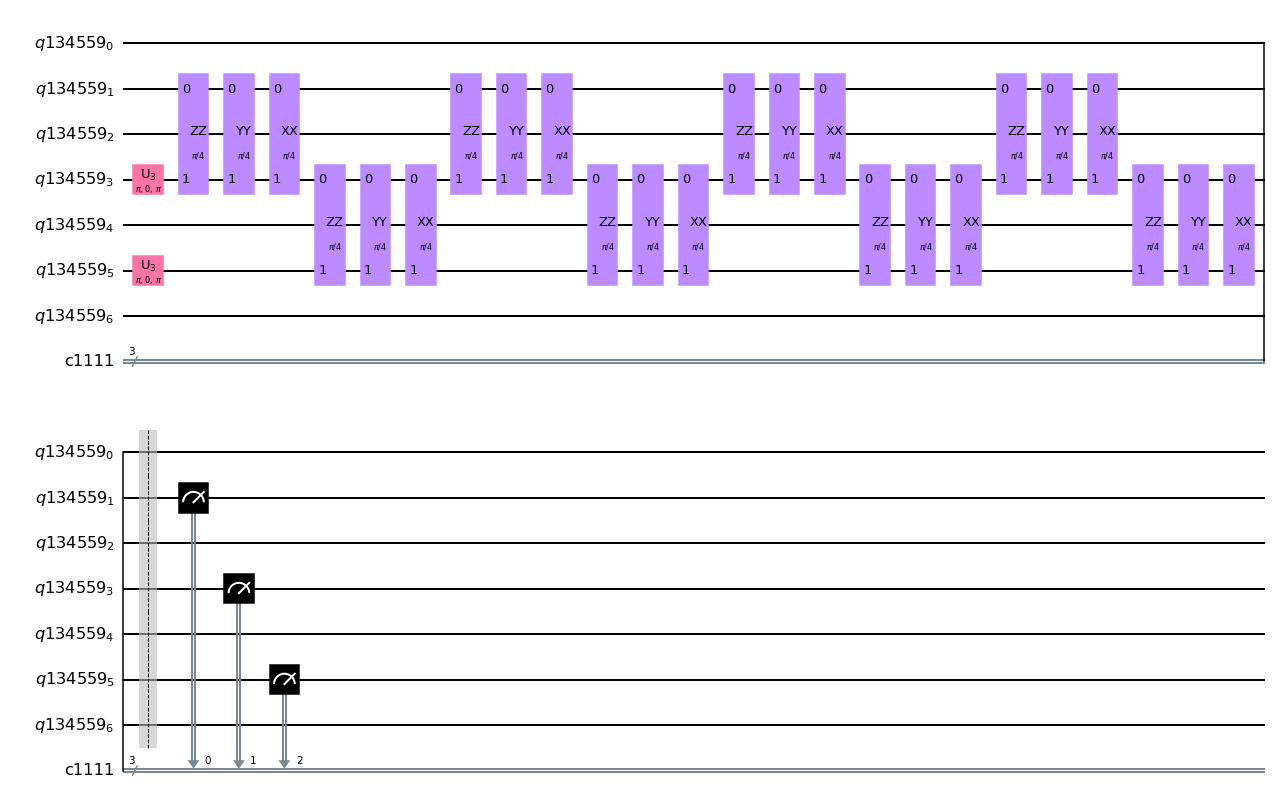

################################################################################

1/8 - Job ID 8db12dde-fcce-4e33-b440-e225a8fb02c1
2/8 - Job ID 8690f102-df2e-4c7d-aee2-60f579dea5c6
3/8 - Job ID ab508e80-1c7d-41a7-b742-8b1663da138f
4/8 - Job ID 5d758f6e-a2fb-4b4a-ac89-6aee9220e389
5/8 - Job ID 5123357d-dfbe-4f1e-ab97-b75d6616055b
6/8 - Job ID 95e0bc74-bad8-45db-9276-bf0ff7c52995
7/8 - Job ID cf9f7562-8ec9-4ff5-a215-a5c2962e92e2
8/8 - Job ID 59a149a4-54ac-4dc0-a04e-a19a845ff4e2

################################################################################

Final results - order: 1 - strotter steps: 4

State tomography fidelity = 0.0409 ± 0.0005

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:07



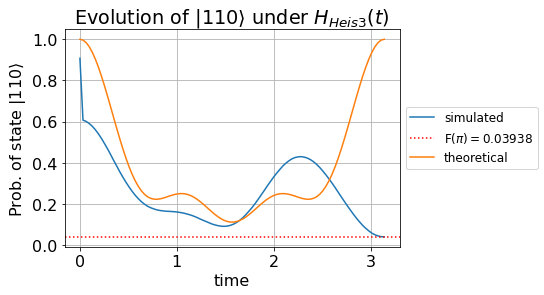

CPU times: user 1min 58s, sys: 2.38 s, total: 2min
Wall time: 1min 57s


In [ ]:
%%time
order, trotter_steps = 1, 4

# ===========================================
# ===========================================
# ===========================================
# Trotterization circuit

view_single_trotter_step(order, Parameter('t'))

# ===========================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ===========================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ===========================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ===========================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta)
plot_simulation_H_all_t(ts, probs, fidelity_pi, plot_theoretical=True)

### First order, 8 steps, uniform time

Single trotterization step:


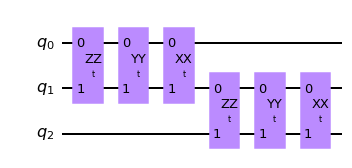

################################################################################

All steps + measurements of state tomography:


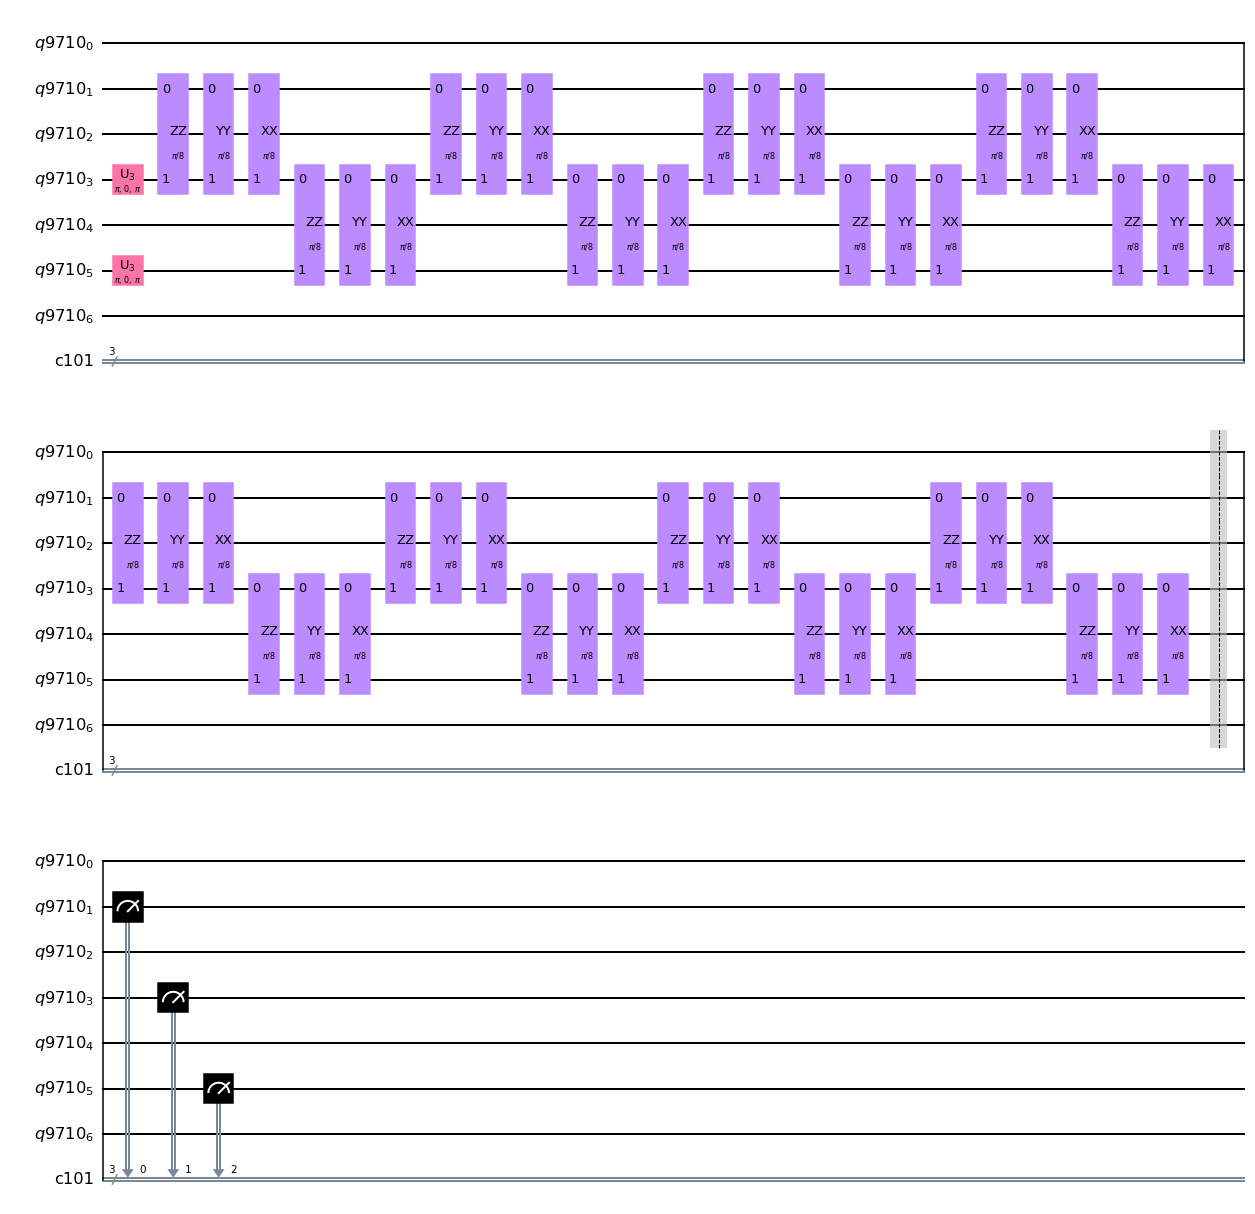

################################################################################

1/8 - Job ID 76f8e2b5-a49b-434e-bcf5-5081d53a465d
2/8 - Job ID 69563ab4-346d-41db-b317-bffc2fa72886
3/8 - Job ID 51805e7e-4d3b-4f5d-b515-f147e6892007
4/8 - Job ID 40de2220-aff2-4f70-b261-3562c5f02305
5/8 - Job ID 7ed9363e-76ba-4c1d-ad6f-4e30243628b5
6/8 - Job ID b9627ff3-2945-4f61-b5f9-94f55ca12ba5
7/8 - Job ID aa3779aa-64a9-4ea4-be80-b907fee81d68
8/8 - Job ID b8563dd6-7c7d-4fce-9c22-13a9b22ed1e4

################################################################################

Final results - order: 1 - strotter steps: 8

State tomography fidelity = 0.3109 ± 0.0026

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:15



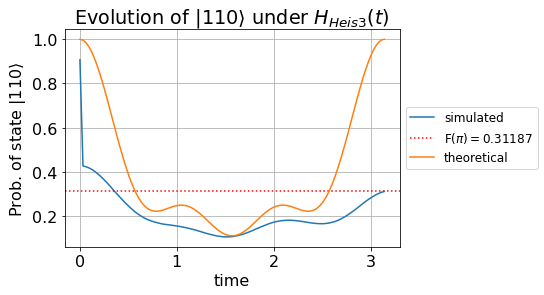

CPU times: user 2min 31s, sys: 2.54 s, total: 2min 34s
Wall time: 2min 26s


In [ ]:
%%time
order, trotter_steps = 1, 8

# ===========================================
# ===========================================
# ===========================================
# Trotterization circuit

view_single_trotter_step(order, Parameter('t'))

# ===========================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ===========================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ===========================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ===========================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta)
plot_simulation_H_all_t(ts, probs, fidelity_pi, plot_theoretical=True)

### Second order, 4 steps, uniform time

Single trotterization step:


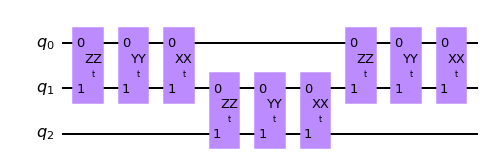

################################################################################

All steps + measurements of state tomography:


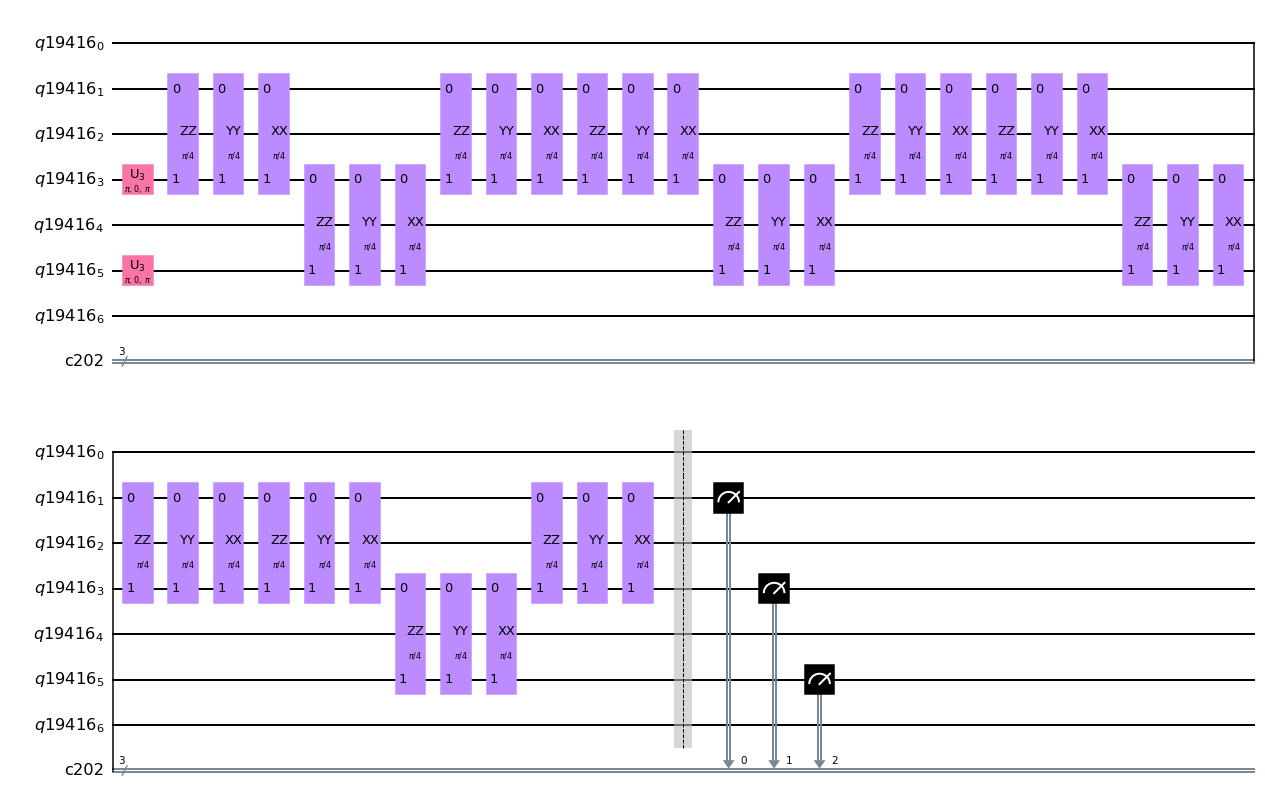

################################################################################

1/8 - Job ID 69f3f72e-f311-4166-8e57-6973d456970c
2/8 - Job ID bc15ca30-0157-4edb-a1d9-02ddb2a64194
3/8 - Job ID 31fce3c6-c72a-4614-baa0-89e9256314be
4/8 - Job ID 8b143772-6961-4f65-8d70-ac613f14424b
5/8 - Job ID cda6d717-4cab-4ec0-ac3b-cb2a8fe360ee
6/8 - Job ID bcb31c1f-3381-4d63-ba93-f0d6079878f0
7/8 - Job ID 2622a5d9-fbb6-40e6-a9dc-047b0eca84ee
8/8 - Job ID 6bd1fd78-392e-46df-8b27-9433850e6105

################################################################################

Final results - order: 2 - strotter steps: 4

State tomography fidelity = 0.1585 ± 0.0027

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:08



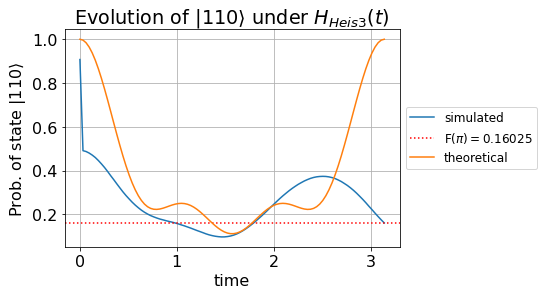

CPU times: user 2min 10s, sys: 2.21 s, total: 2min 12s
Wall time: 2min 4s


In [ ]:
%%time
order, trotter_steps = 2, 4

# ===========================================
# ===========================================
# ===========================================
# Trotterization circuit

view_single_trotter_step(order, Parameter('t'))

# ===========================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ===========================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ===========================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ===========================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

### First order, 8 steps, uniform time

Single trotterization step:


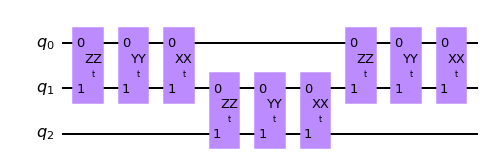

################################################################################

All steps + measurements of state tomography:


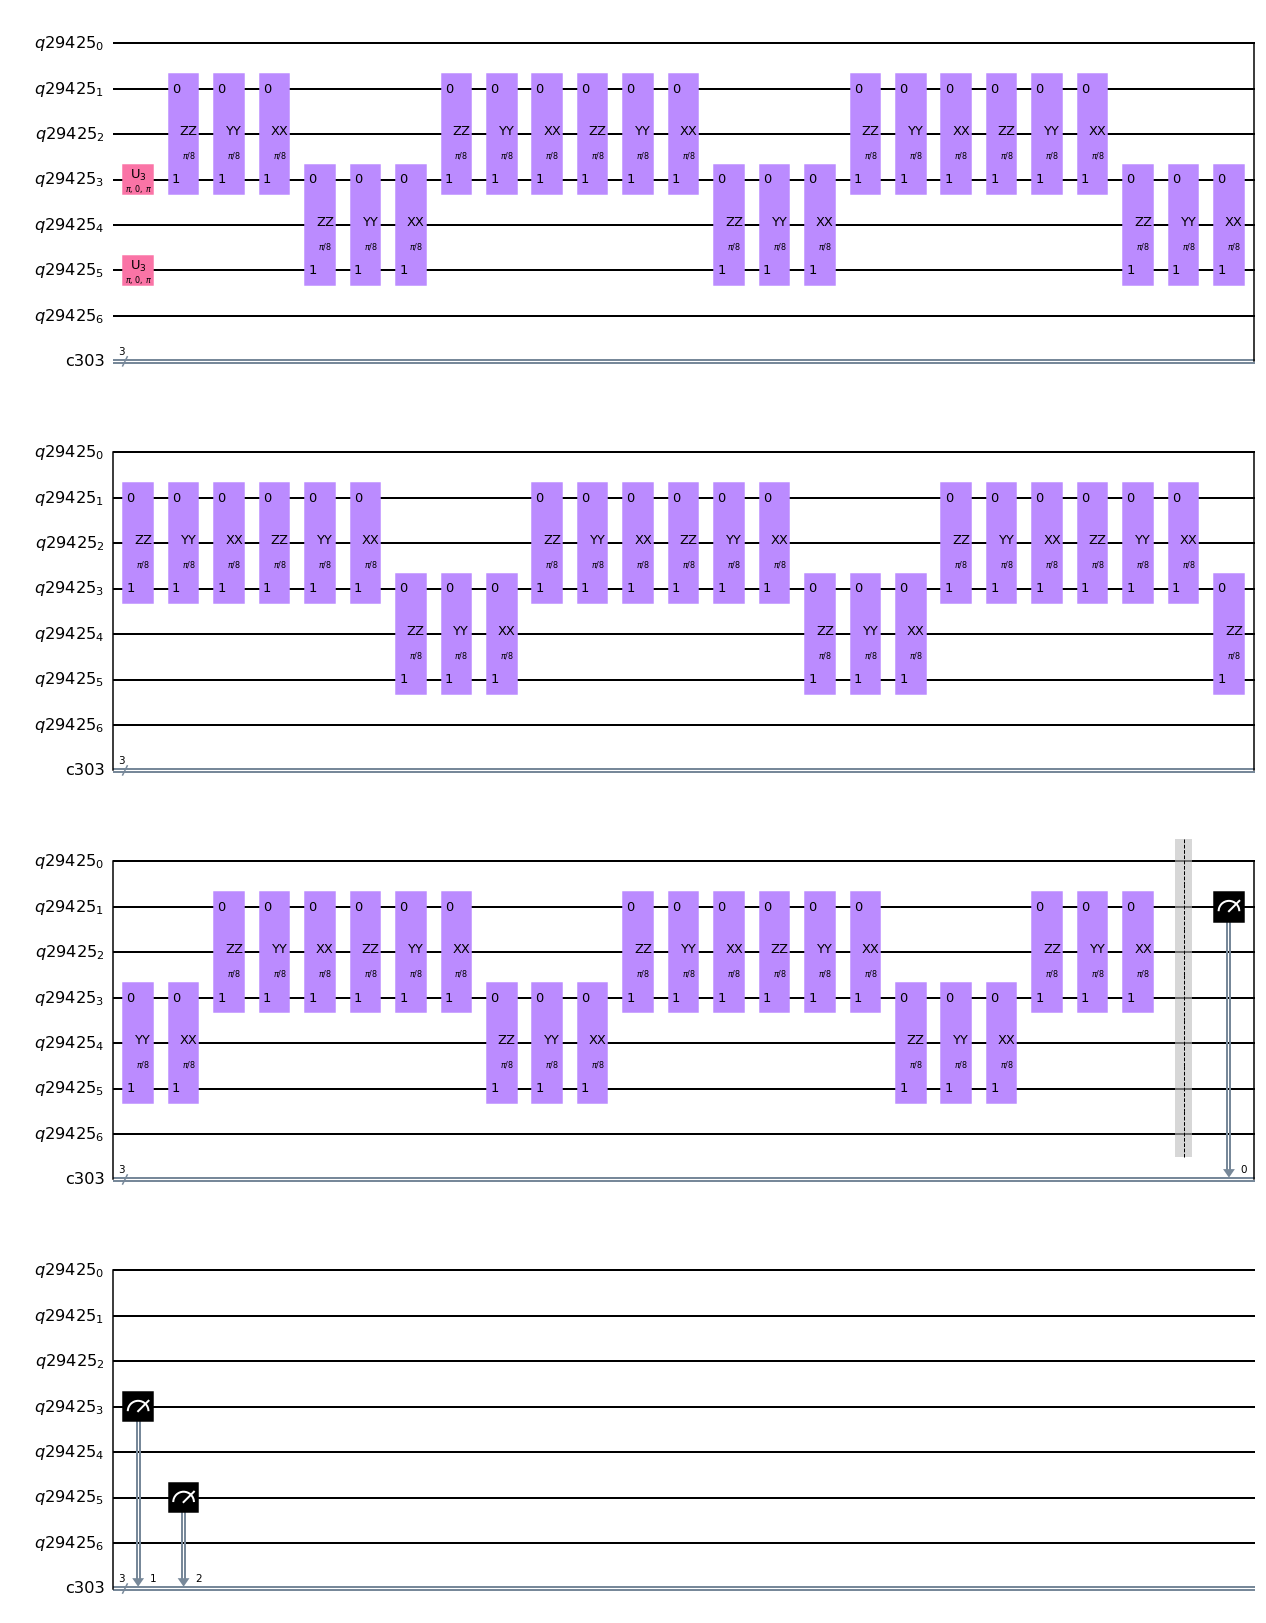

################################################################################

1/8 - Job ID 0277af76-d4ab-4f9a-9931-53b8767a7193
2/8 - Job ID c31689a6-6cbd-412e-a13f-44eecde32a16
3/8 - Job ID c7fd8456-23c7-4b52-9f49-24cd87676596
4/8 - Job ID 81507b21-2568-410e-b9f3-93bf21cd4f73
5/8 - Job ID 9f4cd9cd-75cf-4aa1-a56f-76fcb098504f
6/8 - Job ID 2717d031-cd3e-4888-a927-210ae2159fbf
7/8 - Job ID b6b8acfc-c069-4ea2-9cd1-2d3eb301417b
8/8 - Job ID dded0e3c-eee6-4839-88b5-1d09514222ec

################################################################################

Final results - order: 2 - strotter steps: 8

State tomography fidelity = 0.2162 ± 0.0021

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:30



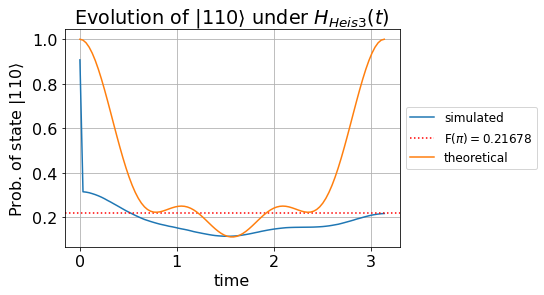

CPU times: user 3min 18s, sys: 2.86 s, total: 3min 20s
Wall time: 3min 12s


In [ ]:
%%time
order, trotter_steps = 2, 8

# ===========================================
# ===========================================
# ===========================================
# Trotterization circuit

view_single_trotter_step(order, Parameter('t'))

# ===========================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ===========================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ===========================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ===========================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

______________
______________
______________
______________

# Now, variable time!

First idea: time in each one of the $N$ steps won't be $t/N$ as above. Rather, we'll have individual (and different!) times such that $t_1 + \cdots + t_N = t$.

For $N=4$, Rafa found these as the optimal times: $t_1 = t_2 = 1.5608; t_3 = t_4 = 0.01$

In [ ]:
t1 = t2 = 1.5608
t3 = t4 = (np.pi - 2*(t1))/2

steps_times = [t4, t1, t2, t3, t4]

steps_times

[0.009996326794896593,
 1.5608,
 1.5608,
 0.009996326794896593,
 0.009996326794896593]

### First order, 4 steps, variable time, changing order

Single trotterization step:


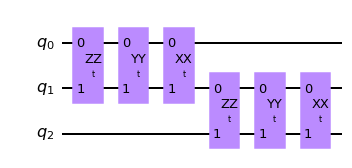

################################################################################

All steps + measurements of state tomography:


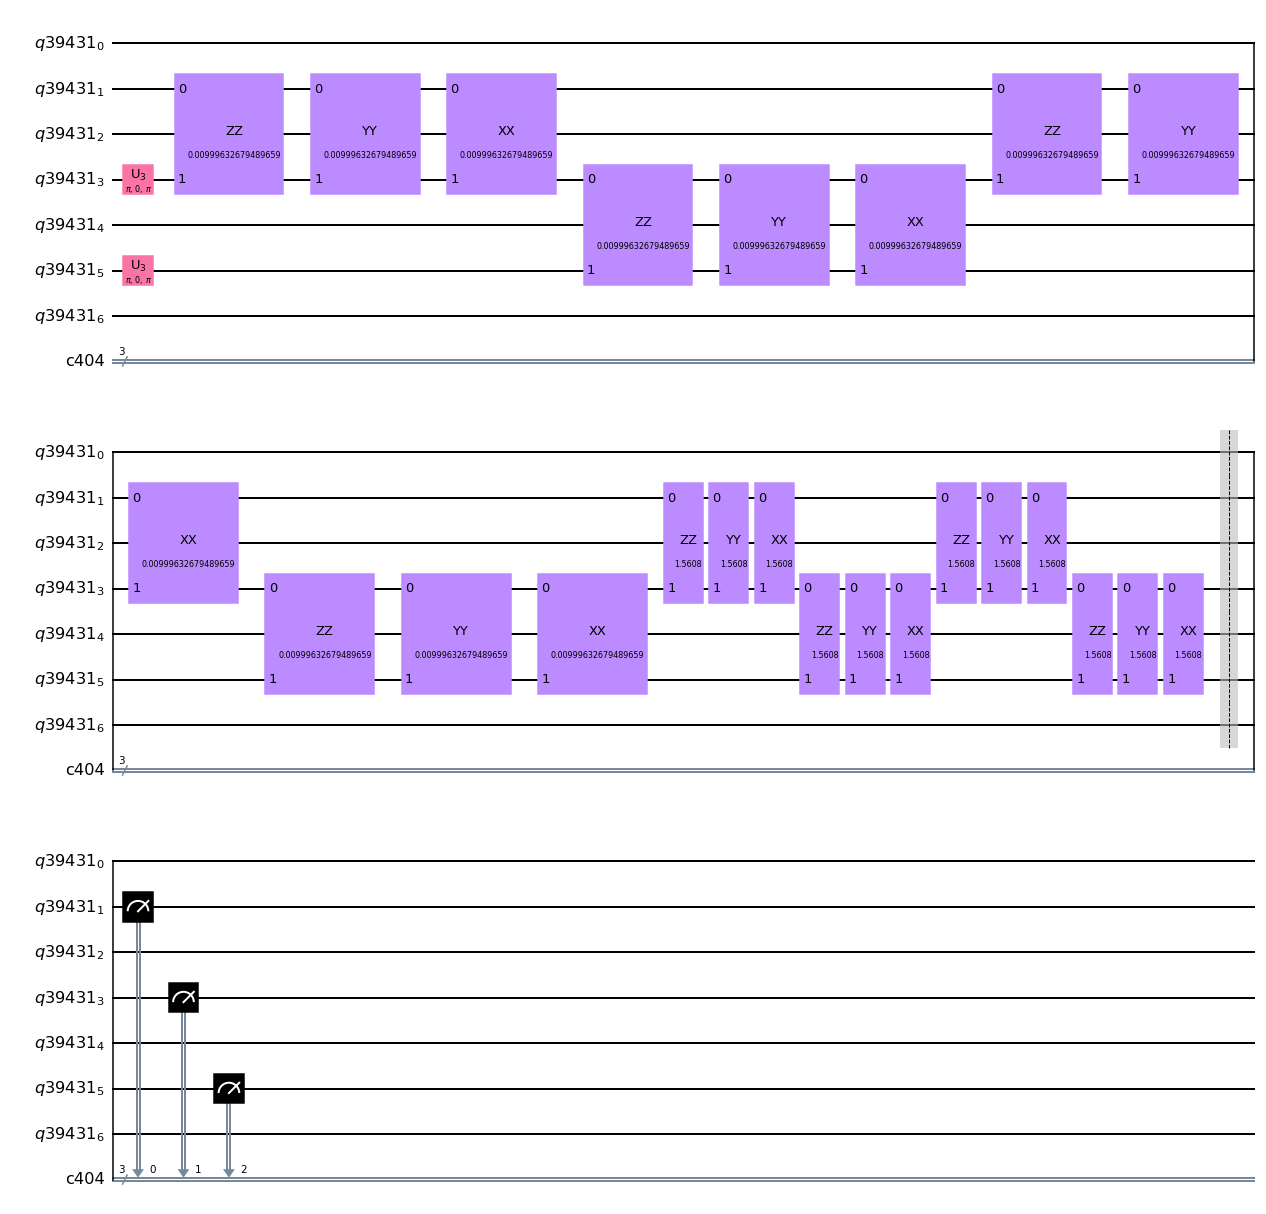

################################################################################

1/8 - Job ID 828e5c70-6cb8-428f-a2aa-1ce0dbfaef65
2/8 - Job ID 87e84223-eb31-45d9-a6af-c7a5a3f34f9d
3/8 - Job ID 4ac2e3f8-0119-49c0-b864-7def1855e08b
4/8 - Job ID c55c2474-6b8b-4d46-a6ca-04f07fcaf221
5/8 - Job ID b4aaa8df-1299-4225-bd47-b03d4022c128
6/8 - Job ID 3155a98f-6fe4-404d-a062-46f7fa9334ea
7/8 - Job ID c4928cfc-47e8-4b45-85fd-0ded22affd6c
8/8 - Job ID 48c482b4-a84d-411b-a906-501df801b5d1

################################################################################

Final results - order: 1 - strotter steps: 4

State tomography fidelity = 0.6037 ± 0.0025

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:03



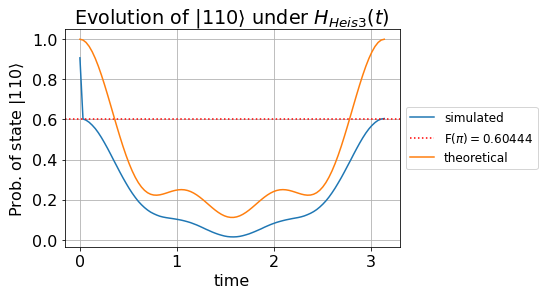

CPU times: user 1min 51s, sys: 2.19 s, total: 1min 54s
Wall time: 1min 46s


In [ ]:
%%time
steps_times = [t3, t4, t1, t2]

steps_times

order, trotter_steps = 1, 4
uniform_times = False
steps_times = steps_times

# ===========================================
# ===========================================
# ===========================================
# Trotterization circuit

view_single_trotter_step(order, Parameter('t'))

# ===========================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=steps_times)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ===========================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ===========================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ===========================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=steps_times)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

### First order, 5 steps, variable time - first time small

Single trotterization step:


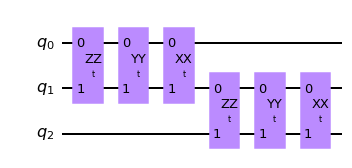

################################################################################

All steps + measurements of state tomography:


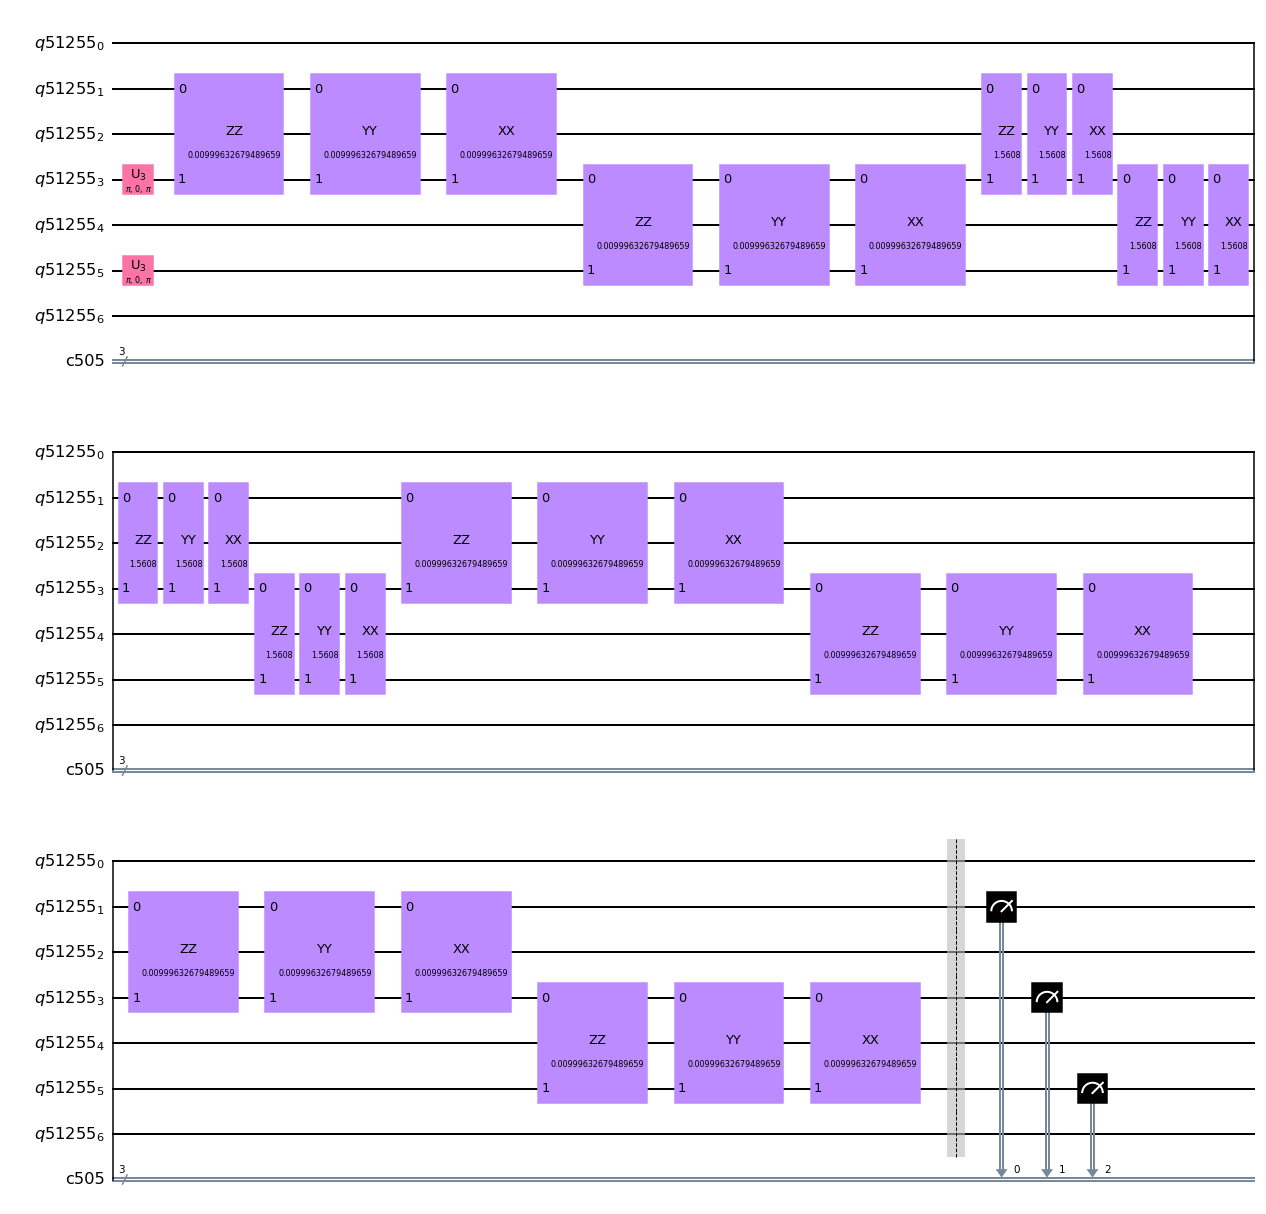

################################################################################

1/8 - Job ID f85c9669-d066-49f5-962f-ca9c2f6081e5
2/8 - Job ID 2cff47ac-2c61-452a-807c-757833a1e014
3/8 - Job ID 6eb46e3e-4f9e-4fea-a42b-512da01d6d39
4/8 - Job ID 2ecda642-adfe-460a-986d-94b4b2f1804a
5/8 - Job ID 41739cda-43d1-4849-80ca-71f3d1b813a9
6/8 - Job ID d2c1262a-6d6d-41c1-ae35-51a55b68216f
7/8 - Job ID b3e99298-6059-49e6-8fa1-c0991532e4b8
8/8 - Job ID 85c13129-bc46-46c3-aa88-719266b27caf

################################################################################

Final results - order: 1 - strotter steps: 5

State tomography fidelity = 0.5513 ± 0.0020

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:06



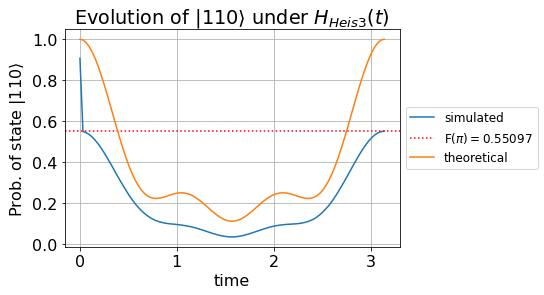

CPU times: user 2min 3s, sys: 2.28 s, total: 2min 5s
Wall time: 1min 57s


In [ ]:
%%time
steps_times = [t3, t1, t2, t3, t4]

steps_times

order, trotter_steps = 1, 5
uniform_times = False
steps_times = steps_times

# ===========================================
# ===========================================
# ===========================================
# Trotterization circuit

view_single_trotter_step(order, Parameter('t'))

# ===========================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=steps_times)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ===========================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ===========================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ===========================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=steps_times)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

### First order, 4 steps, variable time

Single trotterization step:


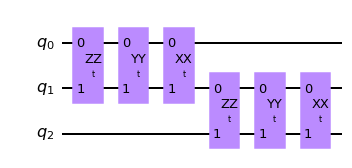

################################################################################

All steps + measurements of state tomography:


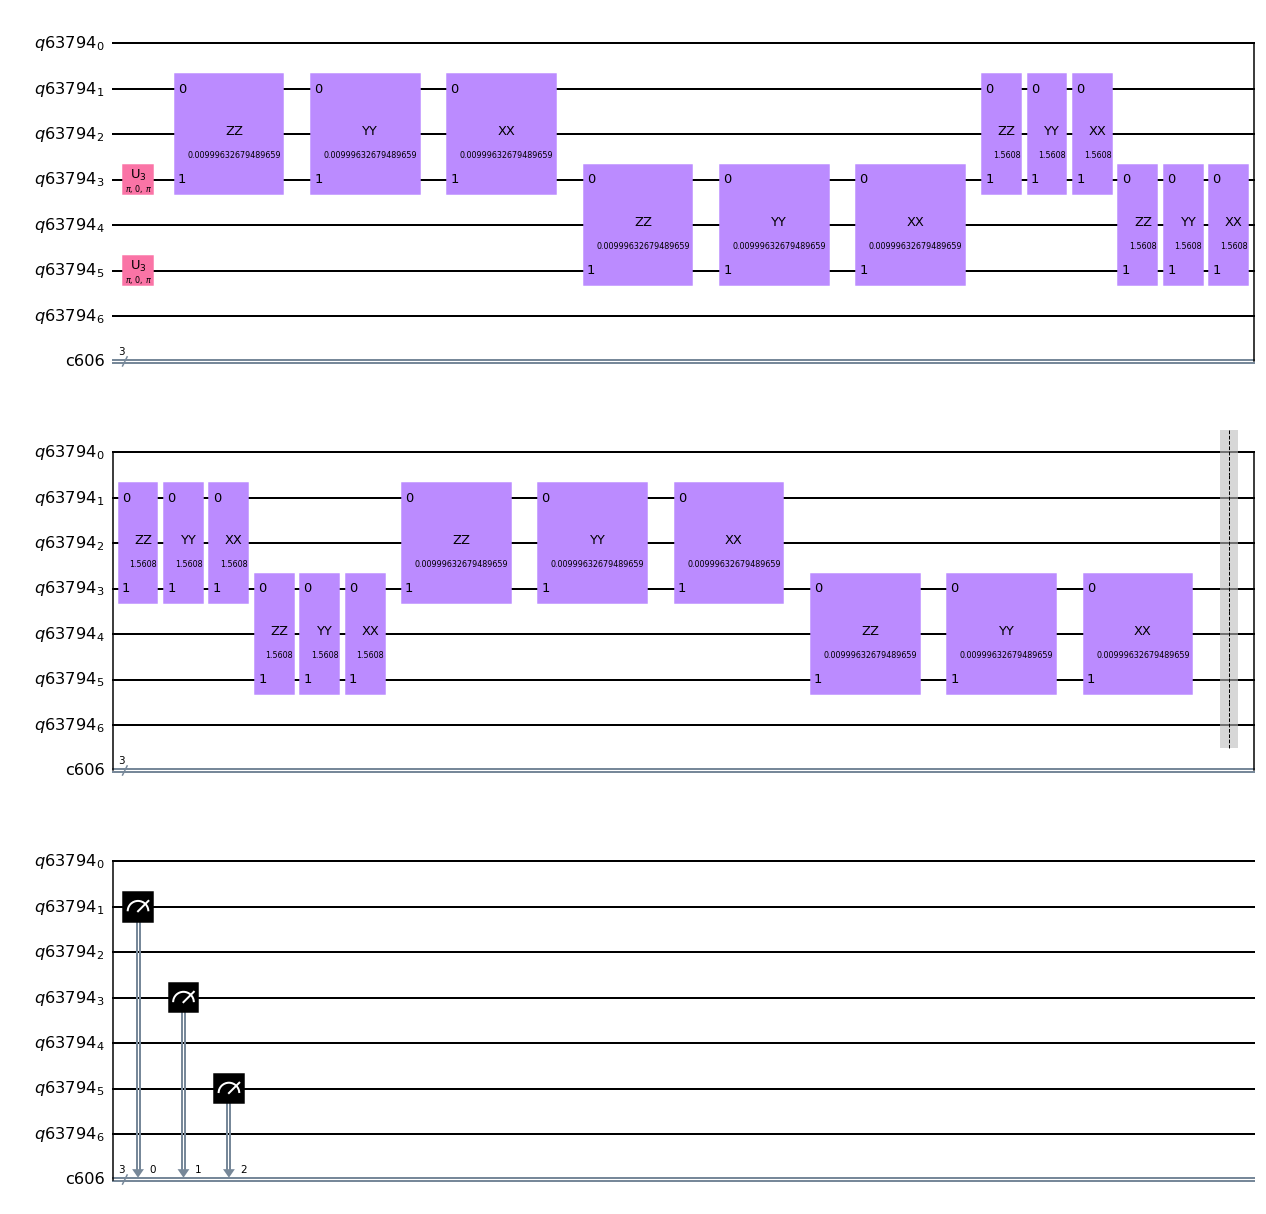

################################################################################

1/8 - Job ID f29922e7-3a5b-4243-9637-371104db6959
2/8 - Job ID 0ada8b99-6c58-45bf-941a-2360092b1bf5
3/8 - Job ID 405a0411-da80-41d4-9caf-ddbeb43d2319
4/8 - Job ID 551c8e7f-d27b-453c-83da-a4c2f5f6f954
5/8 - Job ID 5b5e4d0d-4be6-46b3-886c-a70289d872f3
6/8 - Job ID a33e6bb5-e9a0-45ba-87ef-ef1d3216f509
7/8 - Job ID 869fb1ae-ea72-47df-b007-e325619b8ba4
8/8 - Job ID c421ef2d-5a03-4c47-b7d6-4ec4d564e383

################################################################################

Final results - order: 1 - strotter steps: 4

State tomography fidelity = 0.6054 ± 0.0021

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:00



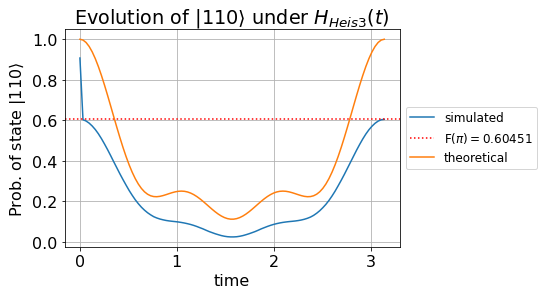

CPU times: user 1min 47s, sys: 1.92 s, total: 1min 49s
Wall time: 1min 42s


In [ ]:
%%time
order, trotter_steps = 1, 4
uniform_times = False
steps_times = [t3,  t1, t2, t4]#steps_times

# ===========================================
# ===========================================
# ===========================================
# Trotterization circuit

view_single_trotter_step(order, Parameter('t'))

# ===========================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=steps_times)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ===========================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ===========================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ===========================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=steps_times)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

In [ ]:
sim_no_noise.configuration().basis_gates

['ccx',
 'cp',
 'cswap',
 'csx',
 'cu',
 'cu1',
 'cu2',
 'cu3',
 'cx',
 'cy',
 'cz',
 'delay',
 'diagonal',
 'h',
 'id',
 'initialize',
 'mcp',
 'mcphase',
 'mcr',
 'mcrx',
 'mcry',
 'mcrz',
 'mcswap',
 'mcsx',
 'mcu',
 'mcu1',
 'mcu2',
 'mcu3',
 'mcx',
 'mcx_gray',
 'mcy',
 'mcz',
 'multiplexer',
 'p',
 'pauli',
 'r',
 'rx',
 'rxx',
 'ry',
 'ryy',
 'rz',
 'rzx',
 'rzz',
 's',
 'sdg',
 'swap',
 'sx',
 'sxdg',
 't',
 'tdg',
 'u',
 'u1',
 'u2',
 'u3',
 'unitary',
 'x',
 'y',
 'z',
 'kraus',
 'qerror_loc',
 'quantum_channel',
 'roerror',
 'save_amplitudes',
 'save_amplitudes_sq',
 'save_density_matrix',
 'save_expval',
 'save_expval_var',
 'save_probabilities',
 'save_probabilities_dict',
 'save_stabilizer',
 'save_state',
 'save_statevector',
 'save_statevector_dict',
 'set_density_matrix',
 'set_stabilizer',
 'set_statevector',
 'snapshot']

In [ ]:
sim_noisy_jakarta.configuration().basis_gates

['cx',
 'id',
 'rz',
 'sx',
 'x',
 'kraus',
 'qerror_loc',
 'quantum_channel',
 'roerror',
 'save_amplitudes',
 'save_amplitudes_sq',
 'save_density_matrix',
 'save_expval',
 'save_expval_var',
 'save_probabilities',
 'save_probabilities_dict',
 'save_stabilizer',
 'save_state',
 'save_statevector',
 'save_statevector_dict',
 'set_density_matrix',
 'set_stabilizer',
 'set_statevector',
 'snapshot']

__________

What's the result in a noiseless backend?

Single trotterization step:


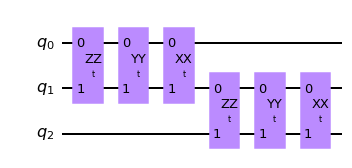

################################################################################

All steps + measurements of state tomography:


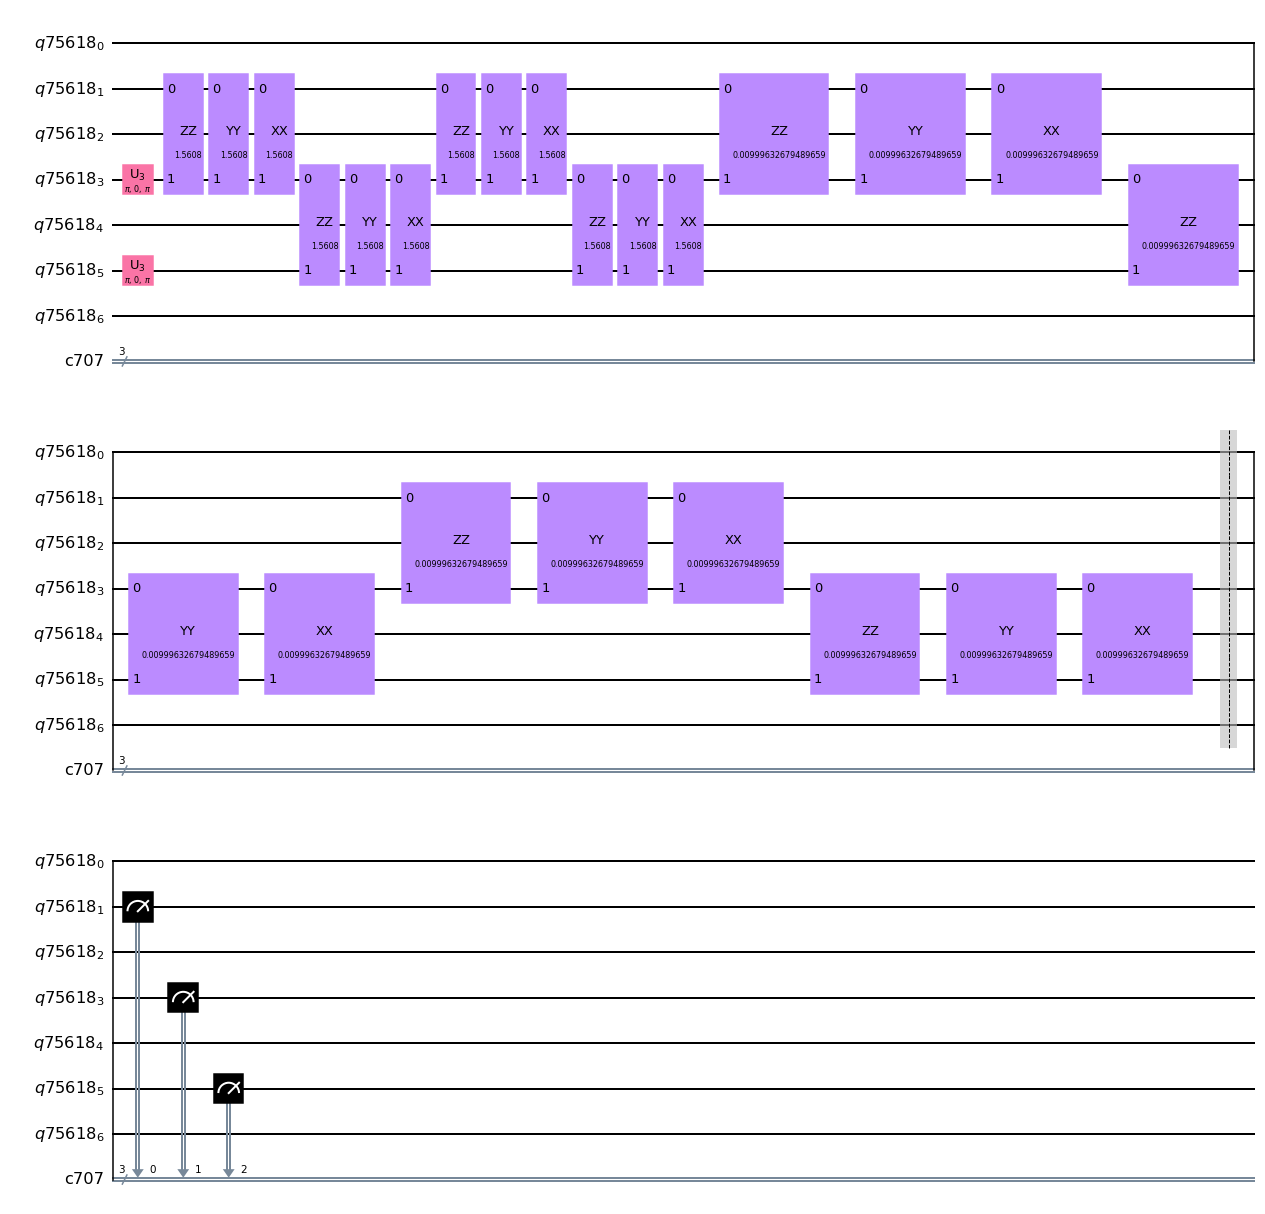

################################################################################

1/8 - Job ID 2f6481f3-8f86-4d45-a8ea-5611570168e2
2/8 - Job ID 96df1881-d9d8-4a2d-b574-f6dfb4eac977
3/8 - Job ID 99d22fa7-20b9-4988-8b77-09c918f6a553
4/8 - Job ID f4f9eb0e-78cd-4809-bfe3-f4c519bc12f9
5/8 - Job ID 616f6724-bce7-4f47-a297-30a528ffe34e
6/8 - Job ID 7b125e69-bc33-40ba-ad22-eae6d7d16890
7/8 - Job ID c1b705b3-7cf6-42f1-b4e0-a88062803bc1
8/8 - Job ID ada20ec1-2d36-4276-a523-4445cbe5a18a

################################################################################

Final results - order: 1 - strotter steps: 4

State tomography fidelity = 0.9960 ± 0.0010

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:04



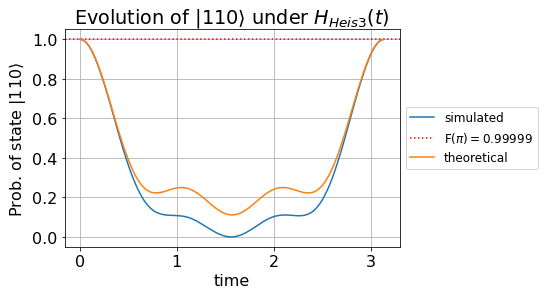

In [ ]:
%%time
order, trotter_steps = 1, 4
uniform_times = False
steps_times = [t1,t2,t3,t4]#steps_times

# ===========================================
# ===========================================
# ===========================================
# Trotterization circuit

view_single_trotter_step(order, Parameter('t'))

# ===========================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=steps_times)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ===========================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_no_noise)

# ===========================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ===========================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_no_noise,
                                          uniform_times=uniform_times, steps_times=steps_times)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

____________

### Second order, 4 steps, variable time

Single trotterization step:


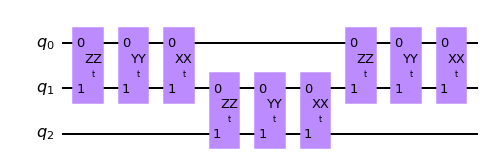

################################################################################

All steps + measurements of state tomography:


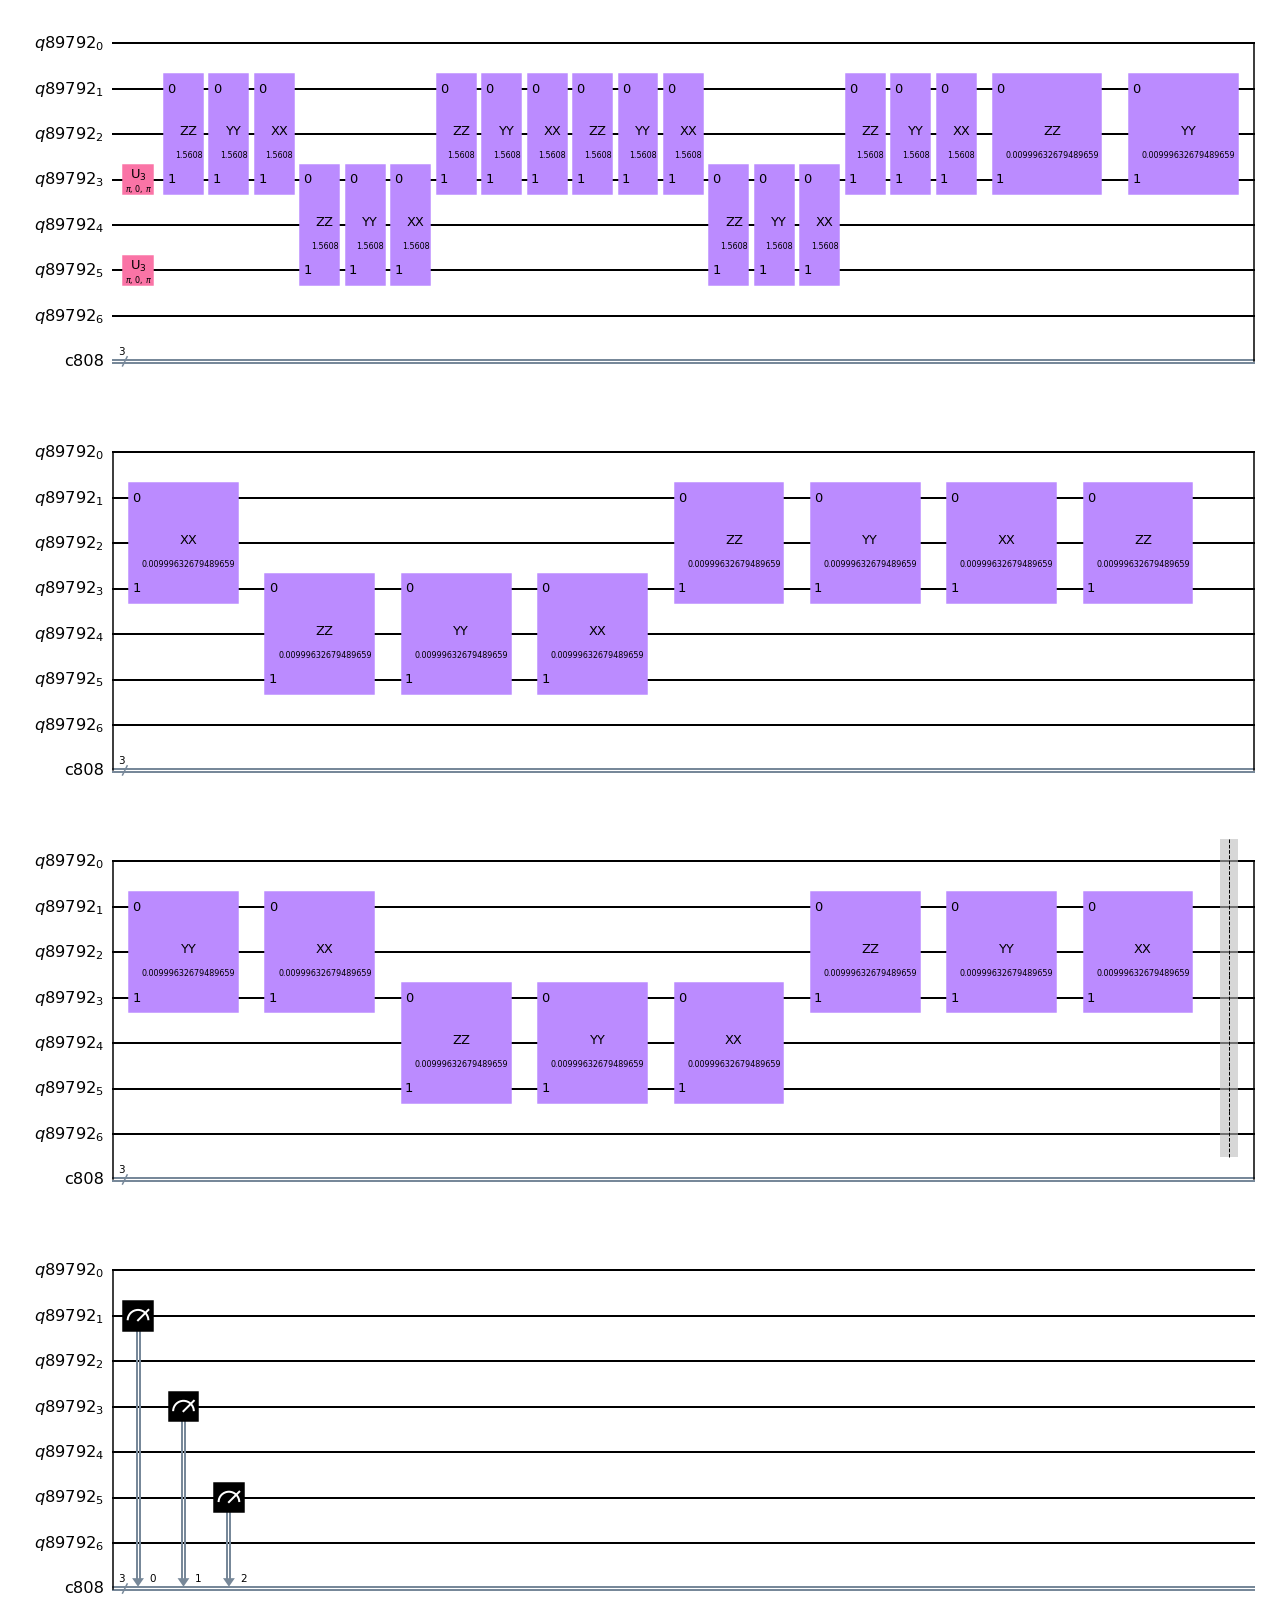

################################################################################

1/8 - Job ID ac273c84-eeb3-4725-8ae6-b04c002a1fa7
2/8 - Job ID eda6c7d1-2e30-49a2-a0a2-dab2751062f0
3/8 - Job ID 5ac60824-1139-4ac4-924e-35cfe6cb5d75
4/8 - Job ID 1f2918af-e6ab-41c0-90f1-5808038bae61
5/8 - Job ID bfe32abf-96c1-4354-8426-67214e50afc2
6/8 - Job ID 234e1986-8b13-434a-8539-9f89c688cc06
7/8 - Job ID 3b52522f-3036-4359-9f58-53b09a33a90f
8/8 - Job ID c937b659-9807-4a43-896d-0e1e5534828f

################################################################################

Final results - order: 2 - strotter steps: 4

State tomography fidelity = 0.4904 ± 0.0017

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:10



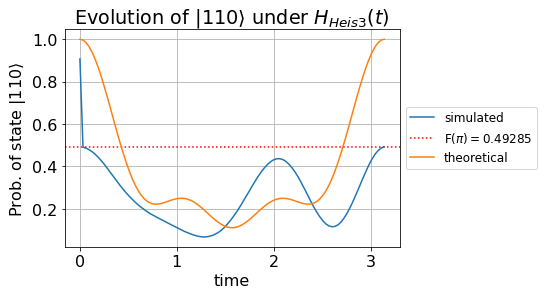

CPU times: user 2min 12s, sys: 2.31 s, total: 2min 14s
Wall time: 2min 7s


In [ ]:
%%time
order, trotter_steps = 2, 4
uniform_times = False
steps_times = steps_times

# ===========================================
# ===========================================
# ===========================================
# Trotterization circuit

view_single_trotter_step(order, Parameter('t'))

# ===========================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=steps_times)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ===========================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ===========================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ===========================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=steps_times)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

_________

Maybe we can try 8 steps? (Although I don't think it'll be better, given that the majority of the evolution happens in the first steps, as done above.)

Obs.: in this case, times weren't optmized. I'll try to adapt, let's see.

In [ ]:
t1 = t2 = t3 = t4 = 1.5608/2
t5 = t6 = t7 = t8 = (np.pi - 4*(t1))/4

steps_times = [t1, t2, t3, t4, t5, t6, t7, t8]

steps_times

[0.7804,
 0.7804,
 0.7804,
 0.7804,
 0.004998163397448296,
 0.004998163397448296,
 0.004998163397448296,
 0.004998163397448296]

### First order, 8 steps, variable time

Single trotterization step:


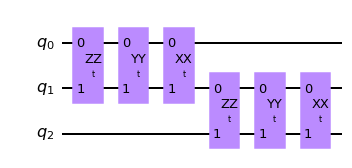

################################################################################

All steps + measurements of state tomography:


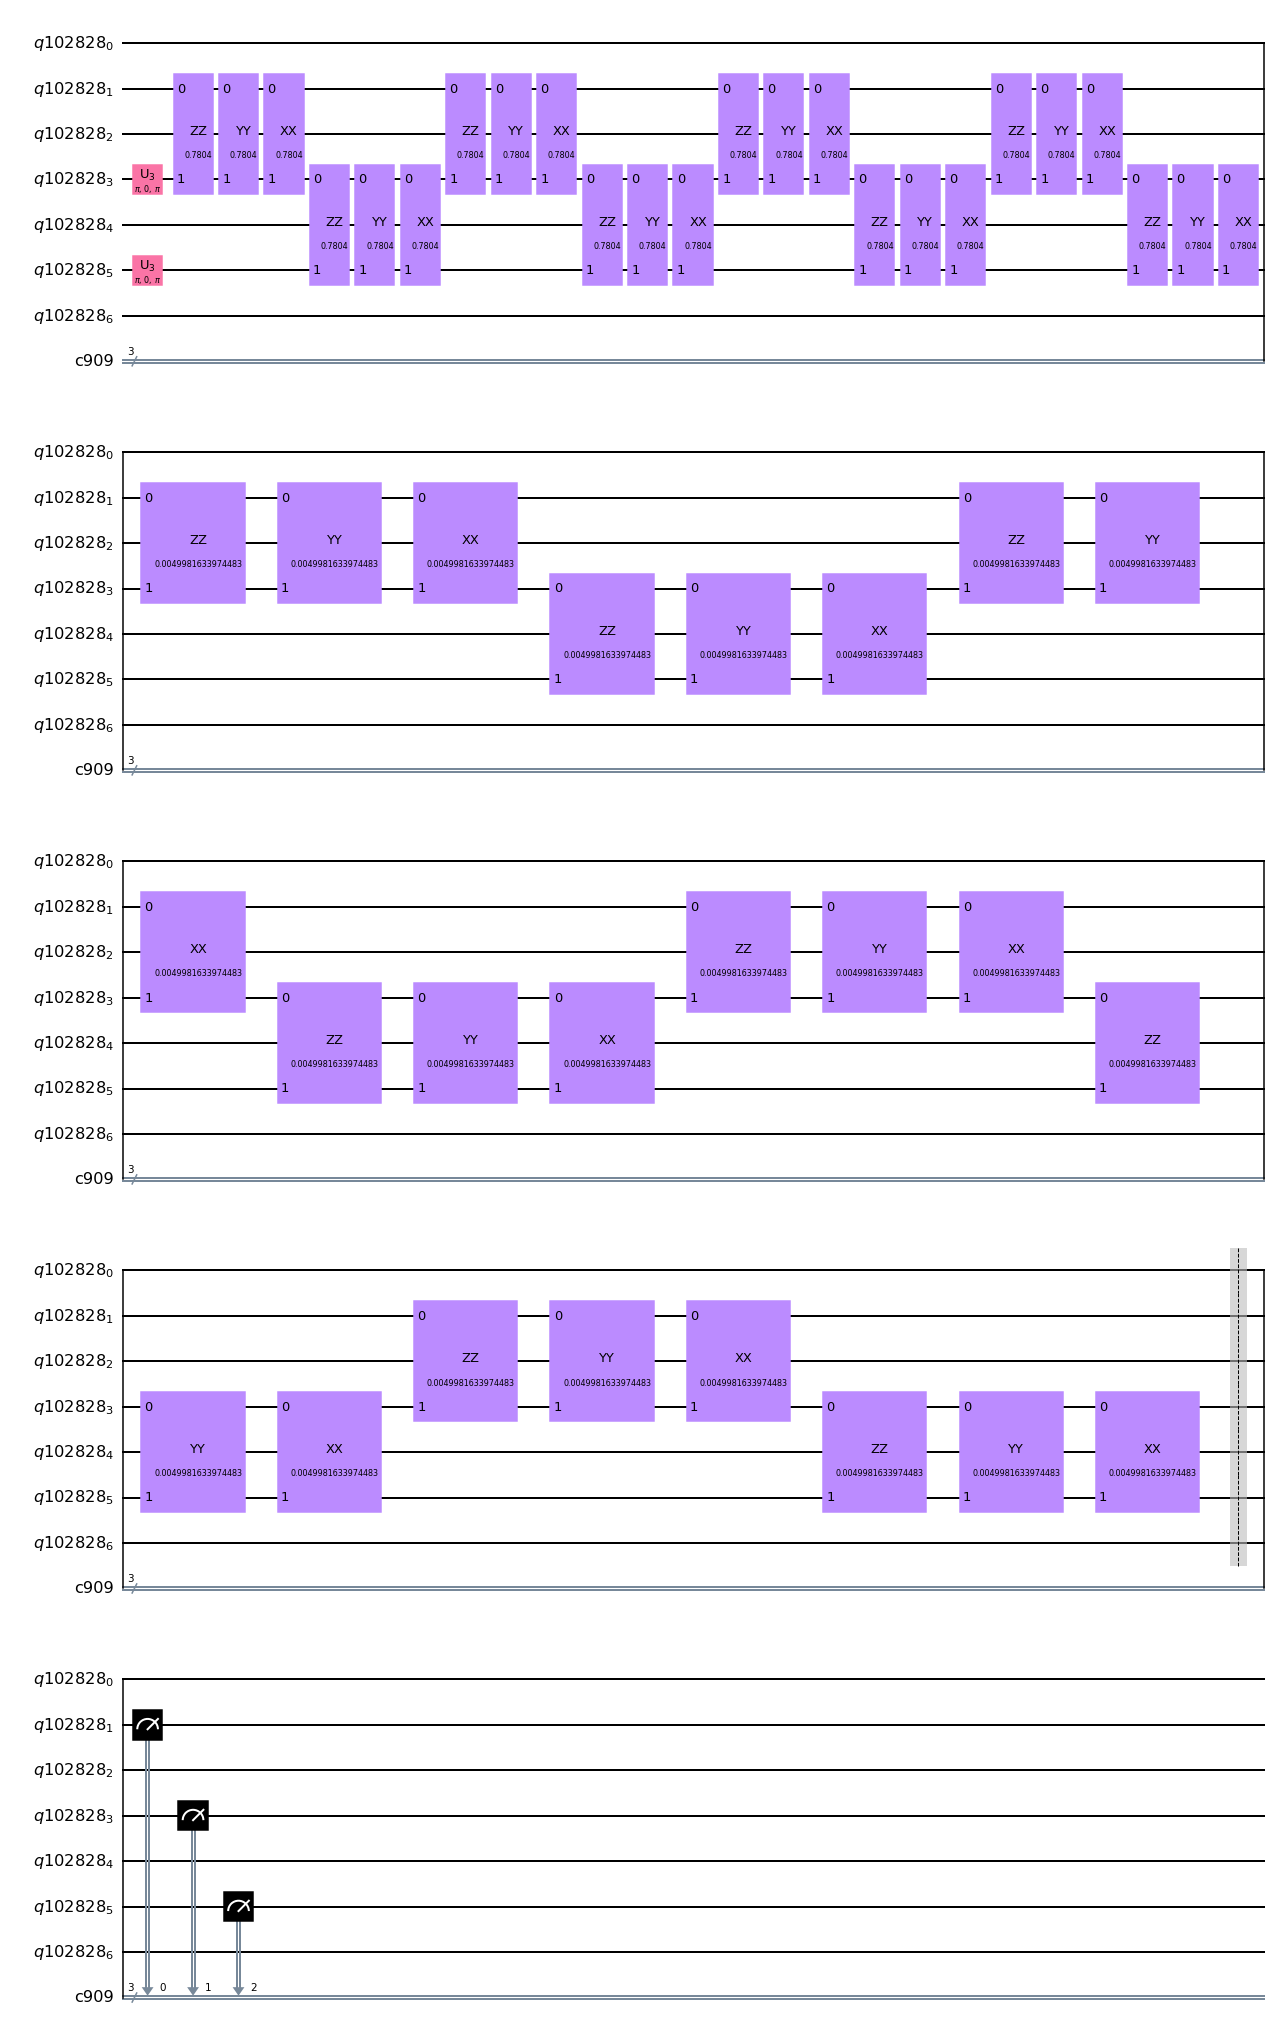

################################################################################

1/8 - Job ID 0152f352-6b2d-485d-bfc0-2dafb0c68f6c
2/8 - Job ID a967244f-673d-4c9f-8e85-540673b63bb0
3/8 - Job ID a9dc11a6-08bf-40b3-98dc-122bfaedbf29
4/8 - Job ID 37ae465b-eecb-4e09-9040-93c3d5d98678
5/8 - Job ID cac15f6f-e570-4ecd-9fd1-8f9b11a64406
6/8 - Job ID 19e5ba03-f934-4384-be85-8693baff7a20
7/8 - Job ID 50e2dbe5-df95-4e58-93c4-6d556801acd2
8/8 - Job ID 837816f8-afc1-4a43-b8b9-959ed9b3b890

################################################################################

Final results - order: 1 - strotter steps: 8

State tomography fidelity = 0.0492 ± 0.0014

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:21



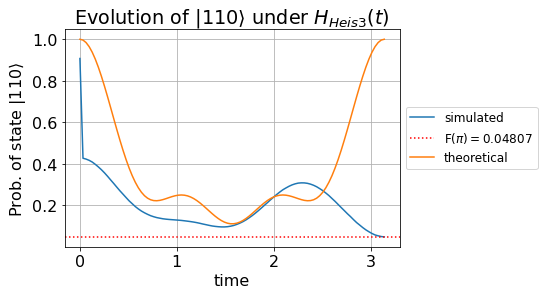

CPU times: user 2min 41s, sys: 2.31 s, total: 2min 43s
Wall time: 2min 36s


In [ ]:
%%time
order, trotter_steps = 1, 8
uniform_times = False
steps_times = steps_times

# ===========================================
# ===========================================
# ===========================================
# Trotterization circuit

view_single_trotter_step(order, Parameter('t'))

# ===========================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=steps_times)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ===========================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ===========================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ===========================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=steps_times)
plot_simulation_H_all_t(ts, probs, fidelity_pi)

### Second order, 8 steps, variable time

Single trotterization step:


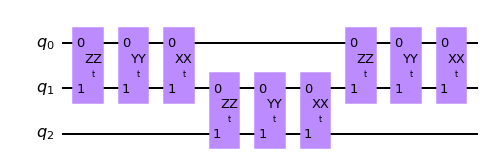

################################################################################

All steps + measurements of state tomography:


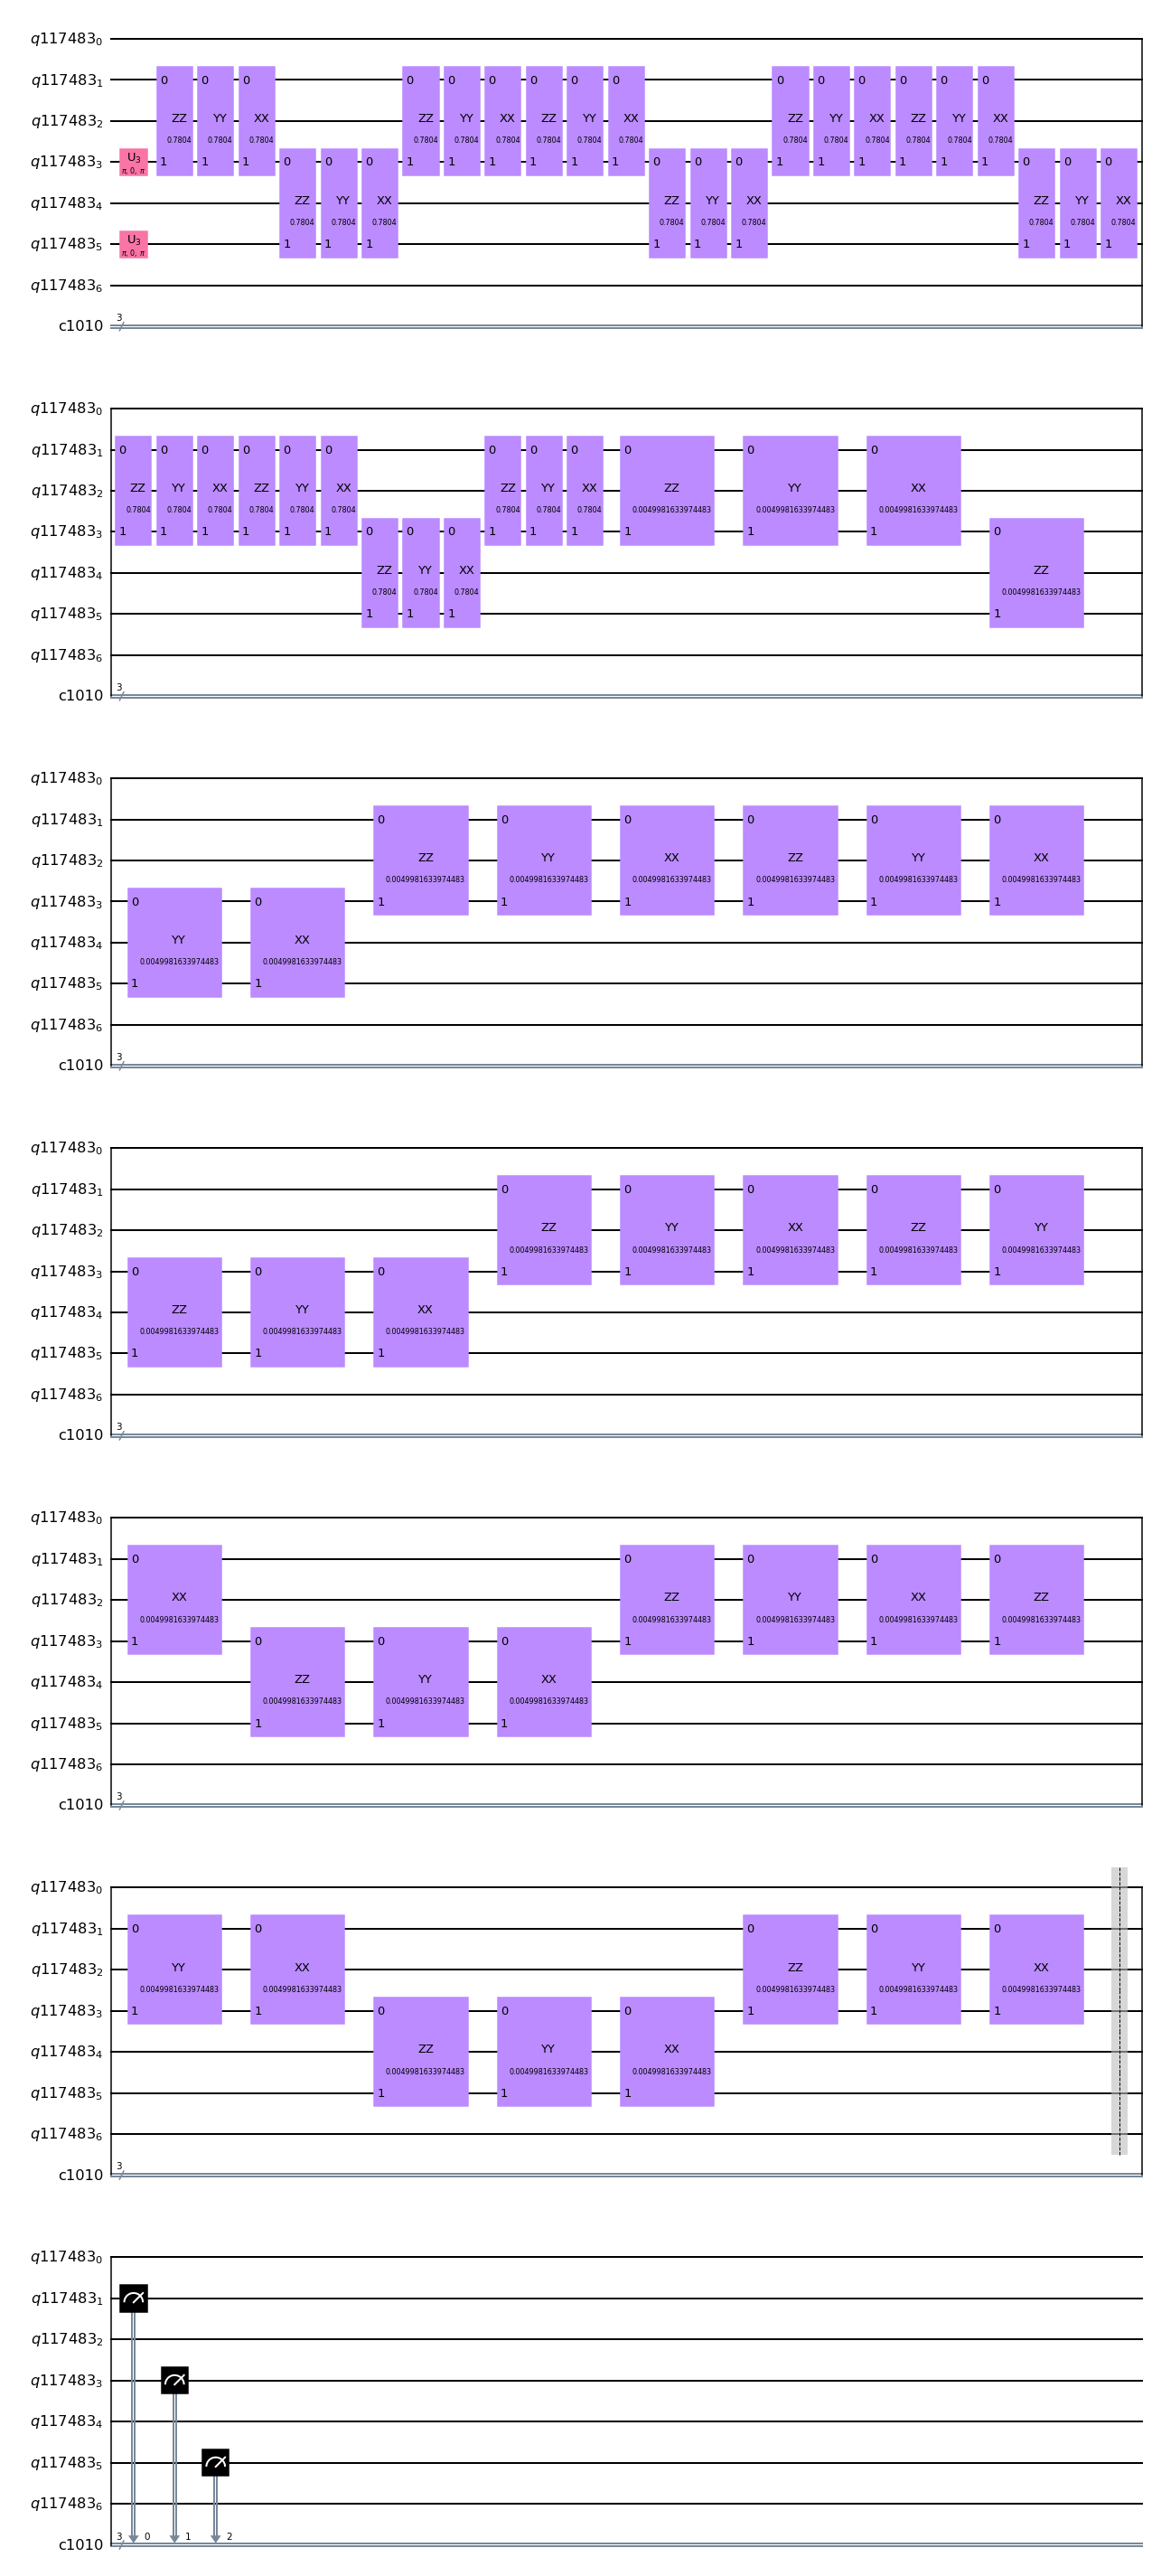

################################################################################

1/8 - Job ID 80fa9486-e3a7-489c-b658-0ff4cdba7cc8
2/8 - Job ID 26873445-b210-4ec1-88fc-7ab602c773b1
3/8 - Job ID dc4c3ef4-047e-4b4f-a8fc-839b53c3ae77
4/8 - Job ID 452b022f-80be-496c-9470-e2af20ff6dbb
5/8 - Job ID 8ccc09c7-1477-48d1-b397-39506646bd42
6/8 - Job ID 7c0264c2-e576-49df-a68d-a846fb0f9b84
7/8 - Job ID ce9fd05e-b589-4e90-b072-afb3d28b1690
8/8 - Job ID 53110a2e-7ca6-4002-b6fa-5a61a78b3fe8

################################################################################

Final results - order: 2 - strotter steps: 8

State tomography fidelity = 0.1349 ± 0.0016

################################################################################

Starting simulation for times from 0 to pi!
Simulation ended!
Total time of simulation: 00:01:40



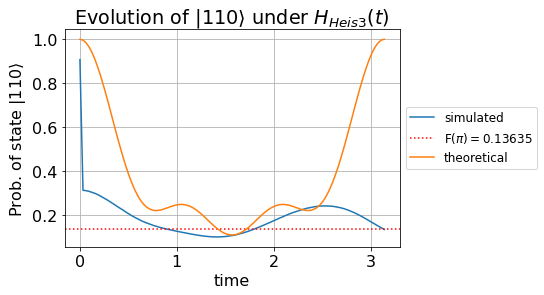

CPU times: user 3min 30s, sys: 2.75 s, total: 3min 33s
Wall time: 3min 24s


In [ ]:
%%time
order, trotter_steps = 2, 8
uniform_times = False
steps_times = steps_times

# ===========================================
# ===========================================
# ===========================================
# Trotterization circuit

view_single_trotter_step(order, Parameter('t'))

# ===========================================
# Trotterized Time Evolution

st_qcs = state_tomagraphy_circs(order, trotter_steps,
                                uniform_times=uniform_times, steps_times=steps_times)

print("\nAll steps + measurements of state tomography:")
show_decompose(st_qcs[-1], 1)

# ===========================================
# Execution

jobs = execute_st_simulator(st_qcs, backend=sim_noisy_jakarta)

# ===========================================
# Results Analysis

fids = final_fidelities(jobs, st_qcs, order, trotter_steps)

# ===========================================
# Full evolution for t \in (0, pi)

ts, probs, fidelity_pi = simulate_H_all_t(order, trotter_steps, sim_noisy_jakarta,
                                          uniform_times=uniform_times, steps_times=steps_times)
plot_simulation_H_all_t(ts, probs, fidelity_pi)